<a href="https://colab.research.google.com/github/IndraniMandal/CSC310-S20/blob/master/07_machine_learning_basics_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
###### Set Up #####
# verify our folder with the data and module assets is installed
# if it is installed make sure it is the latest
!test -e ds-assets && cd ds-assets && git pull && cd ..
# if it is not installed clone it 
!test ! -e ds-assets && git clone https://github.com/IndraniMandal/ds-assets.git
# point to the folder with the assets
home = "ds-assets/assets/" 
import sys
sys.path.append(home)      # add home folder to module search path

Cloning into 'ds-assets'...
remote: Enumerating objects: 189, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 189 (delta 10), reused 2 (delta 0), pack-reused 164
Receiving objects: 100% (189/189), 9.63 MiB | 12.18 MiB/s, done.
Resolving deltas: 100% (70/70), done.


# Machine learning with Decision Trees

We will use the scikit-learn module - sklearn.

In [2]:
import pandas as pd
from sklearn import tree
from treeviz import tree_print
from sklearn.metrics import accuracy_score

## Example: Iris Data

**Important:** for decision trees in sklearn the feature matrix has to be numerical!

Let's read the data into a data frame: df

In [3]:
df = pd.read_csv(home+"iris.csv")
df.head()

,id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


Set up the data according to sklearn specs: **feature matrix** and **target vector**:

In [4]:
features_df = df.drop(['id','Species'],axis=1)
features_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
target_df = pd.DataFrame(df['Species'])
target_df.head()

,Species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


We are ready to build our decision tree. Set up the model:

In [6]:
dtree = tree.DecisionTreeClassifier(criterion='entropy')

Build the model:

In [7]:
dtree.fit(features_df,target_df)

DecisionTreeClassifier(criterion='entropy')

Show the actual model.  Decision trees are transparent models so we can just look at them:

In [ ]:
tree_print(dtree,features_df)

if Petal.Width =< 0.800000011920929: 
  |then setosa
  |else if Petal.Width =< 1.75: 
  |  |then if Petal.Length =< 4.950000047683716: 
  |  |  |then if Petal.Width =< 1.6500000357627869: 
  |  |  |  |then versicolor
  |  |  |  |else virginica
  |  |  |else if Petal.Width =< 1.550000011920929: 
  |  |  |  |then virginica
  |  |  |  |else if Sepal.Length =< 6.949999809265137: 
  |  |  |  |  |then versicolor
  |  |  |  |  |else virginica
  |  |else if Petal.Length =< 4.8500001430511475: 
  |  |  |then if Sepal.Width =< 3.100000023841858: 
  |  |  |  |then virginica
  |  |  |  |else versicolor
  |  |  |else virginica
<------------->
Tree Depth:  5


In [15]:
target_df['Species'].unique()

[array(['setosa', 'versicolor', 'virginica'], dtype=object)]

[Ellipsis]

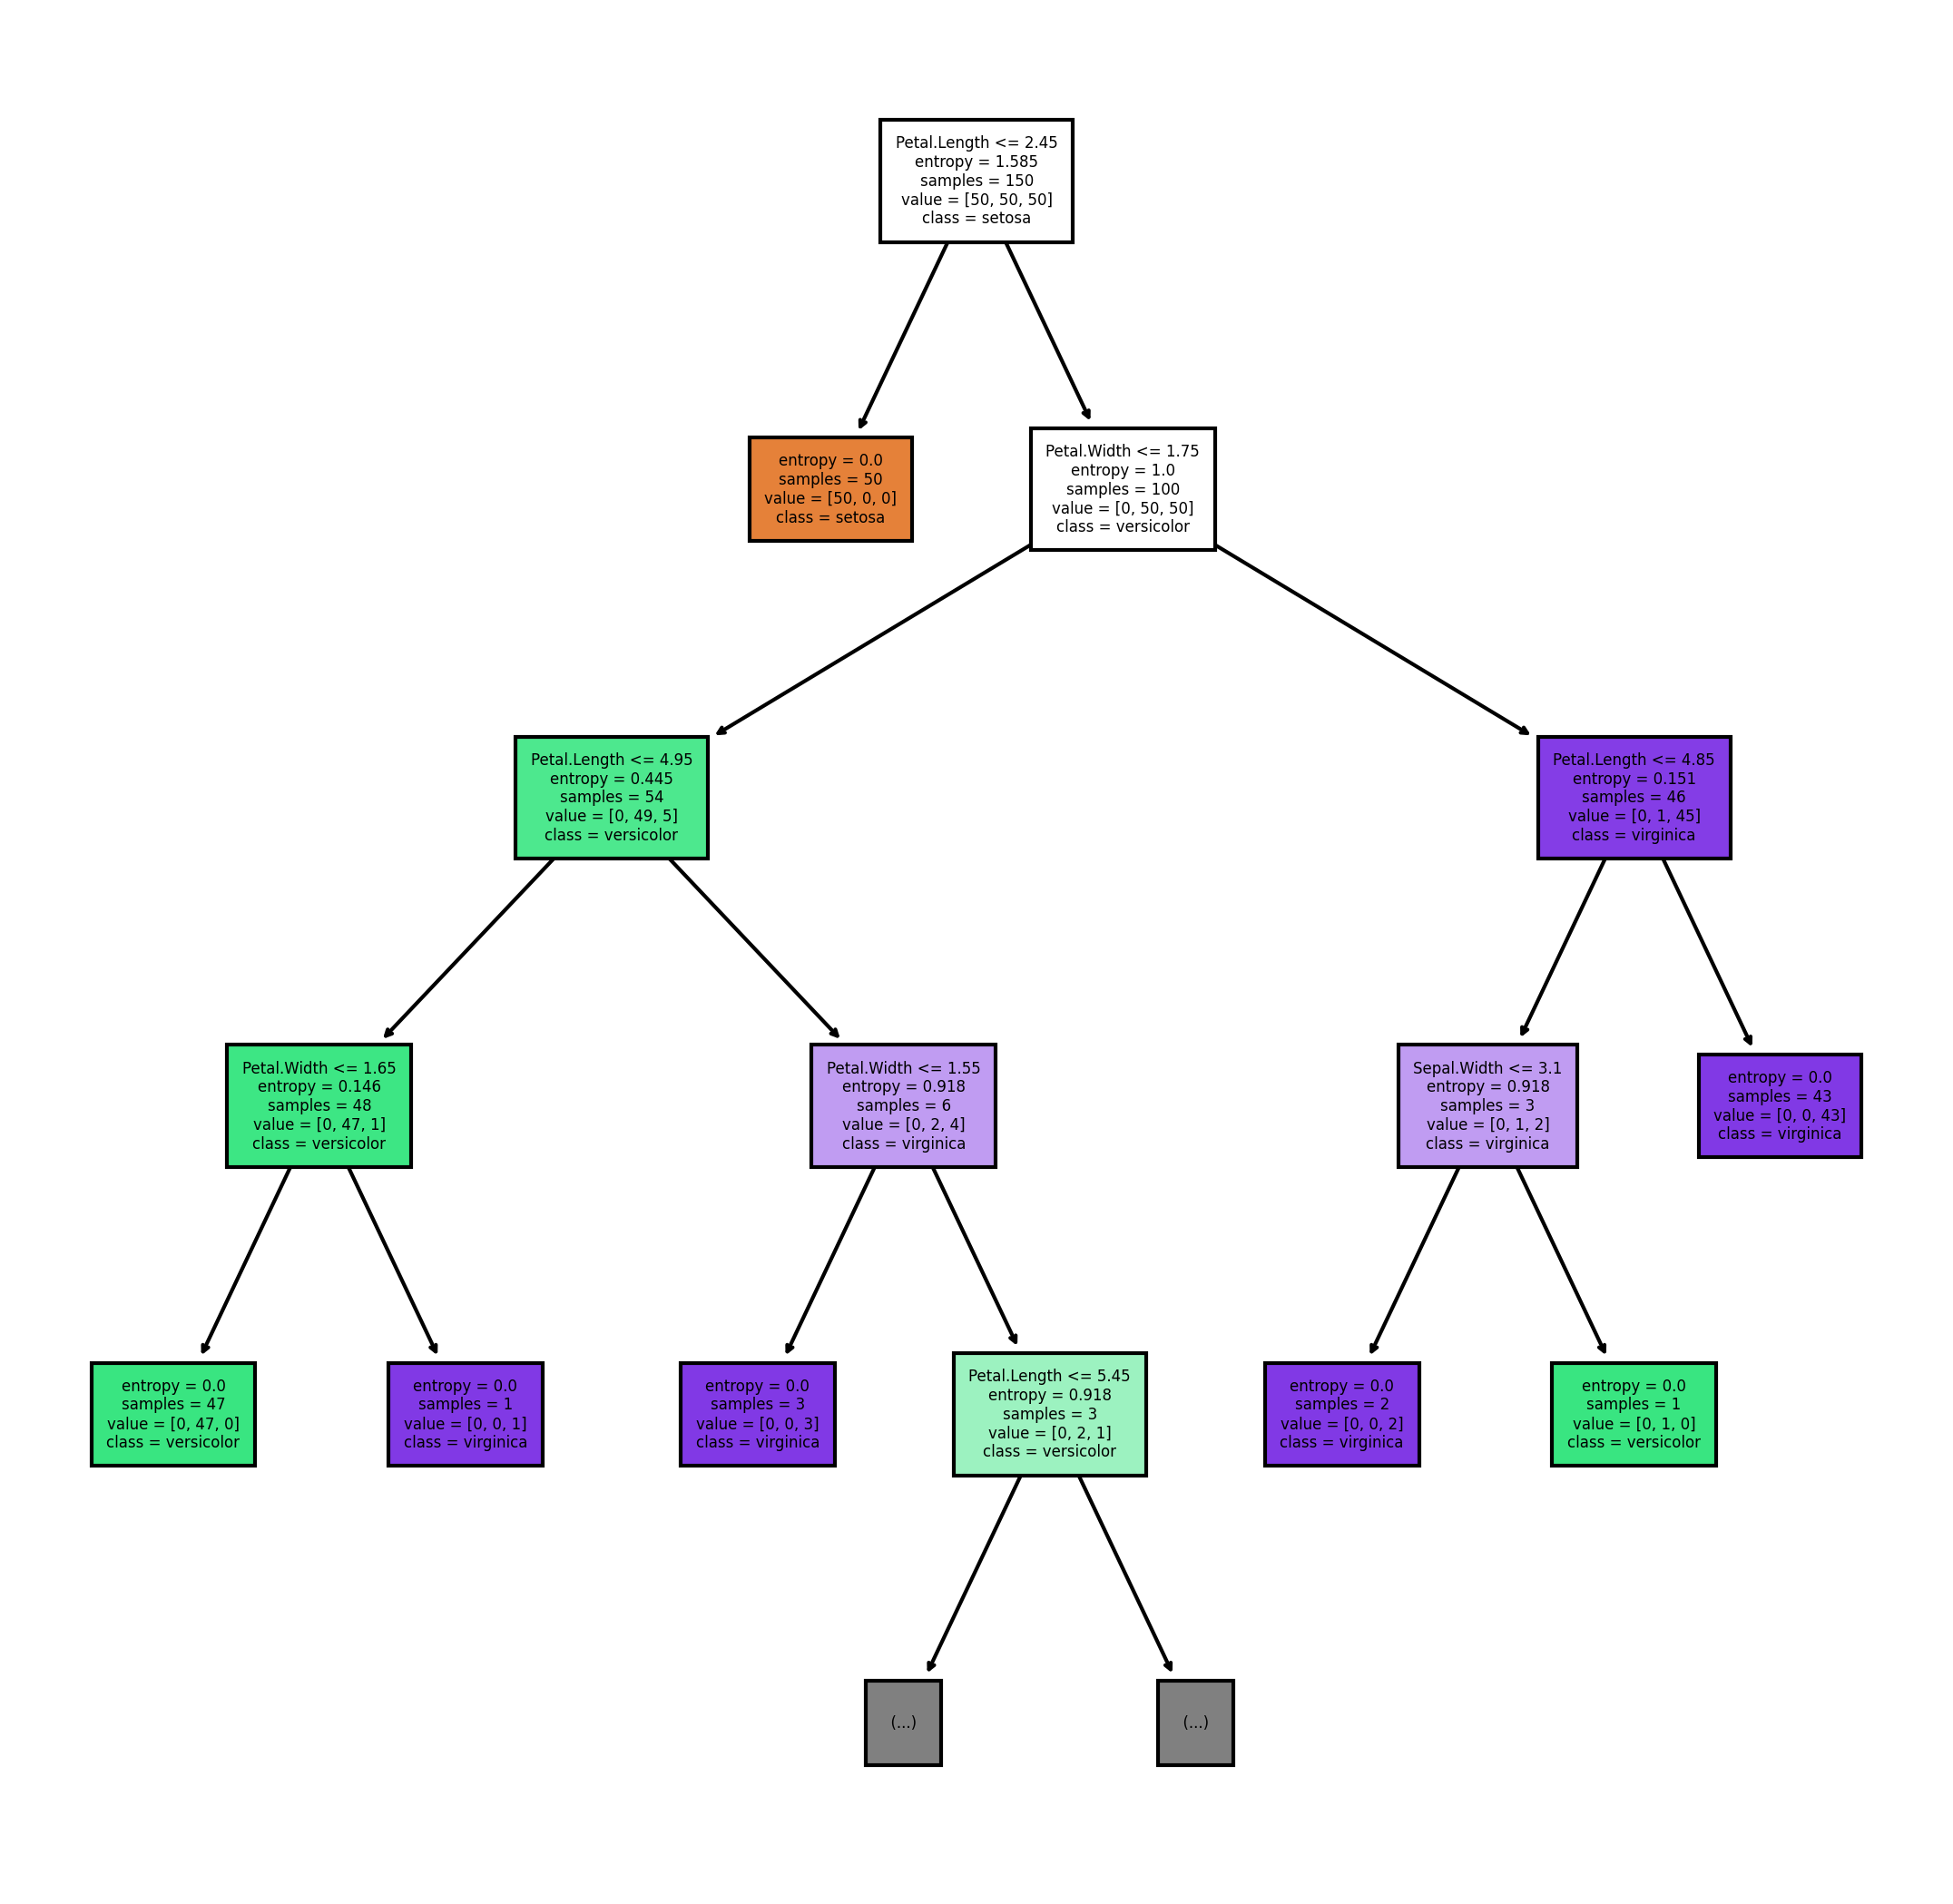

In [17]:
# Visualize the decision tree model
import matplotlib.pyplot as plt  # visualization library
from sklearn.tree import plot_tree
fig, axes = plt.subplots(1, 1, figsize=(9, 9), dpi=300)
plot_tree(dtree, fontsize=4, filled=True, 
               max_depth=4,
               feature_names= features_df.columns,
               class_names= list(target_df['Species'].unique()))
[...]

Let's **evaluate** our model.  Does it make any mistakes when we apply the model back on the training data.  Recall that 'target_df' holds the vector with the original labels.  The idea is to apply our model to the training data 'features_df' and obtain **predicted** labels:

> A correct model is a model where the predicted labels equal the original training labels

In [ ]:
predict_array = dtree.predict(features_df)      # produces an array of labels
predicted_labels = pd.DataFrame(predict_array)  # turn it into a DF
predicted_labels.columns = ['Species']          # name the column - same name as in target!

In [ ]:
predicted_labels.head()

,Species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [ ]:
target_df.head()

,Species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


Now see if the predicted labels equal the labels in target_df:

In [ ]:
predicted_labels.equals(target_df)

True

### Our Model is 100% correct!

# Model Accuracy

We can do a little bit better than just getting a true or false back on the question how good our model is: **model accuracy**

Model accurary is defined as:

> $ \mbox{accuracy} = 1 - \frac{(\mbox{number of errors})}{(\mbox{size of data})}$

sklean has a function for that: **accuracy_score**

In [ ]:
from sklearn.metrics import accuracy_score

print("Our model accuracy is: {}".format(accuracy_score(target_df, predicted_labels)))

Our model accuracy is: 1.0


# Model Parameters

The decision tree model has many *hyperparameters* that we can change.  

```
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
```
The one parameter that we did set in our previous model was **entropy**:
```
dtree = tree.DecisionTreeClassifier(criterion='entropy')
```
Another important parameter for decision trees is the **max_depth** parameter.  It helps us to control **model complexity**.

Let's build another model where we restrict the complexity...

In [19]:
dtree2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
dtree2.fit(features_df,target_df)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [20]:
tree_print(dtree2,features_df)

if Petal.Length =< 2.449999988079071: 
  |then setosa
  |else if Petal.Width =< 1.75: 
  |  |then versicolor
  |  |else virginica
<---->
Tree Depth:  2


[Ellipsis]

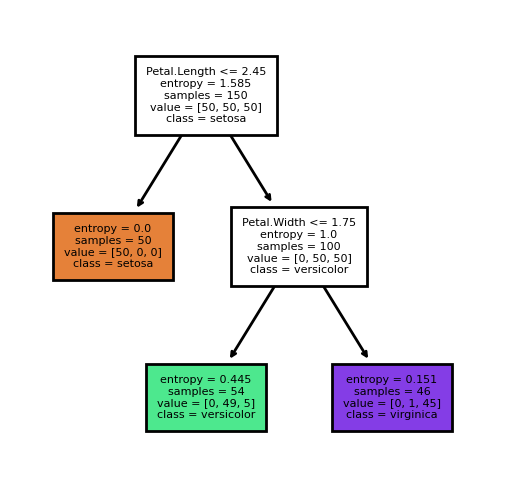

In [25]:
# Visualize the decision tree model
import matplotlib.pyplot as plt  # visualization library
from sklearn.tree import plot_tree
fig, axes = plt.subplots(1, 1, figsize=(3,3), dpi=200)
plot_tree(dtree2, fontsize=4, filled=True, 
               max_depth=4,
               feature_names= features_df.columns,
               class_names= list(target_df['Species'].unique()))
[...]

In [ ]:
predict_array2 = dtree2.predict(features_df)      # produces an array of labels
predicted_labels2 = pd.DataFrame(predict_array2)  # turn it into a DF
predicted_labels2.columns = ['Species']           # name the column - same name as in target!

print("Our model accuracy is: {}".format(accuracy_score(target_df, predicted_labels2)))

Our model accuracy is: 0.96


**Observation**: by restricting the complexity of the model we often obtain very readable and
understandable models without sacrificing a lot of accuracy!

# Reading

* 5.0 [Machine Learning](https://jakevdp.github.io/PythonDataScienceHandbook/05.00-machine-learning.html)
* 5.1 [What Is Machine Learning?](https://jakevdp.github.io/PythonDataScienceHandbook/05.01-what-is-machine-learning.html)
* 5.2 [Introducing Scikit-Learn](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html)
